In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, spectrum_plot_1D, pSweep_1D, LandauEnergyTh, \
FinalizedSystem_1D
import numpy as np
import math
from numpy import pi, fabs
from copy import copy
import matplotlib.pyplot as plt


#Some global and default parameters
SitesCount_XDefault = 600
fsys_1DDefault = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.2, pzNode1 = 0.63110, pzNode2 = -0.63110, \
                     EnergyNode1 = -0.0983, EnergyNode2 = 0.0983, VelocityXNode1 = 2.0, VelocityXNode2 = 2.0, \
                     VelocityZNode1 = 0.684, VelocityZNode2 = -0.684, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-3), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

## Let us take $p^z$ in between the nodes

## Do we observe here an avoided level crossing? The surface states transform into the bulk $n=0$ states, and two different edge values of $p^y$ correspond to different sides of the sample

### (The seemingly linear-in-$p^y$ energy dispersion reminds dispersion of the $B=0$ Fermi arc state - is there a real relationship?)

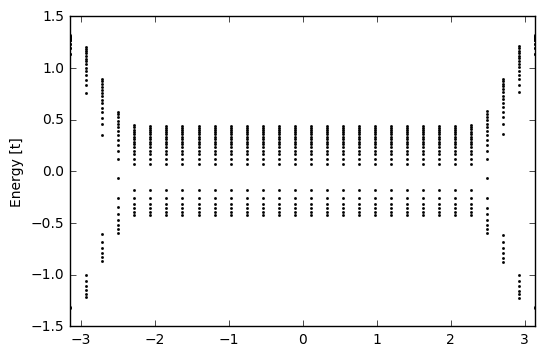

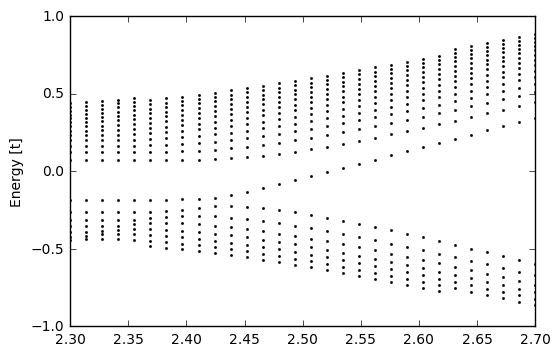

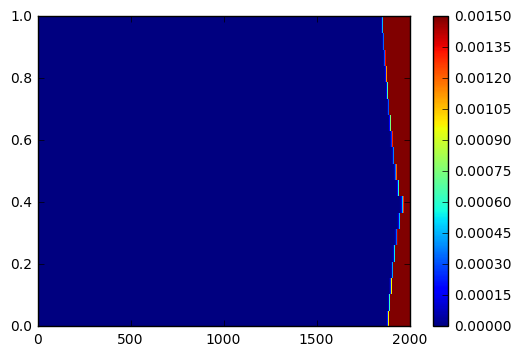

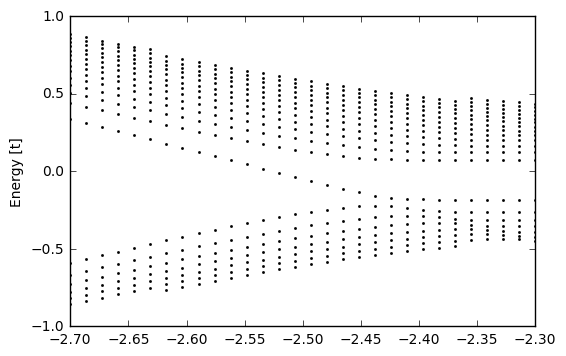

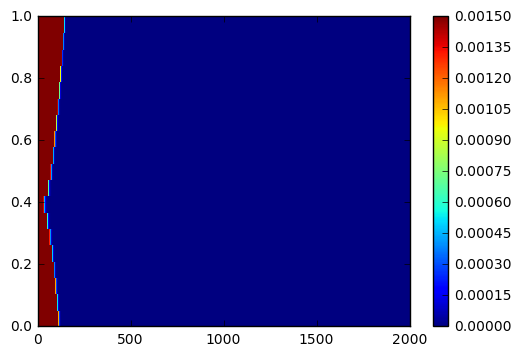

In [7]:
params = copy(ParametersDefault)
params.pz = 0.5
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.

pyMin = -pi
pyMax = pi
pyCount = 30
evals, evecs = diagonalizer.pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)


pyMin = 2.3
pyMax = 2.7
pyCount = 30
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)
density_plot_1D(fsys_1D, params, evecs[15])


pyMin = -2.7
pyMax = -2.3
pyCount = 30
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)
density_plot_1D(fsys_1D, params, evecs[15])


del pyMin, pyMax, pyCount, fsys_1D, params, evals, evecs

# Now, $p^z$ is right at the Weyl node: nothing special (as compared to slightly different values of $p^z$ )

## No avoided crossing anymore!

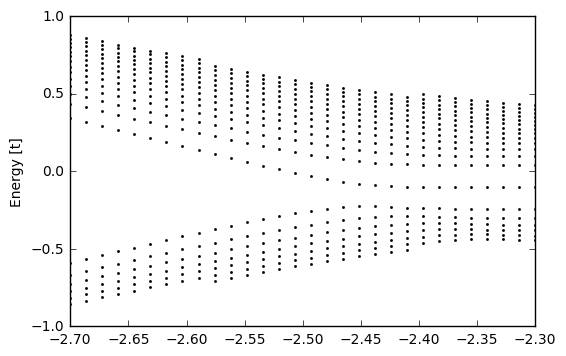

In [9]:
fsys_1D = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.x_shift= 2000./2.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 
params.pz = 0.631

pyMin = -2.7
pyMax = -2.3
pyCount = 30

evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

## The energy of the bulk $n=0$ LL is now chosen to be close to $\mu_F = 0$

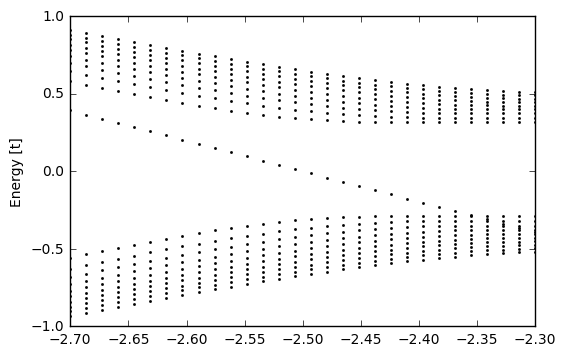

In [10]:
params.pz = 0.77

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.x_shift= 2000./2.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 


pyMin = -2.7
pyMax = -2.3
pyCount = 30
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

## The energy of the bulk $n=0$ LL is close to $\mu_F = 0$, but now $p^z$ is around the other Weyl node: the crossing of the Fermi level appears for values of $p^z$ that are between the Weyl nodes

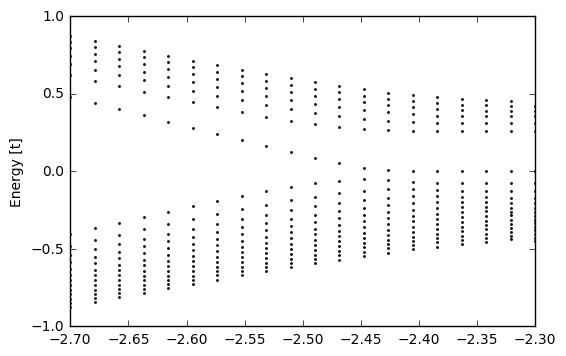

In [11]:
fsys_1D = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.x_shift= 2000./2.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 
params.pz = -0.492

pyMin = -2.7
pyMax = -2.3
pyCount = 20

evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

## For $p^z$ that is just in between the Weyl nodes, nothing special happens

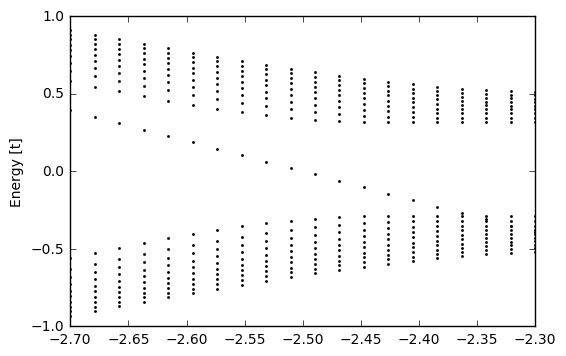

In [12]:
fsys_1D = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.x_shift= 2000./2.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 
params.pz = 0.0

pyMin = -2.7
pyMax = -2.3
pyCount = 20

evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

## Typical picture for $p^z$, for which the $n=0$ level is above the Fermi level

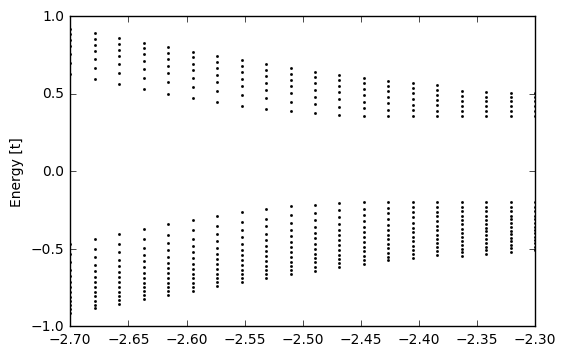

In [14]:
fsys_1D = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.x_shift= 2000./2.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 
params.pz = -1.0

pyMin = -2.7
pyMax = -2.3
pyCount = 20

evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

# Now, let us look at the spectral flow

## The energy is decreased by increasing magnetic field (for a given $p^y$, irrespectively of its actual value)

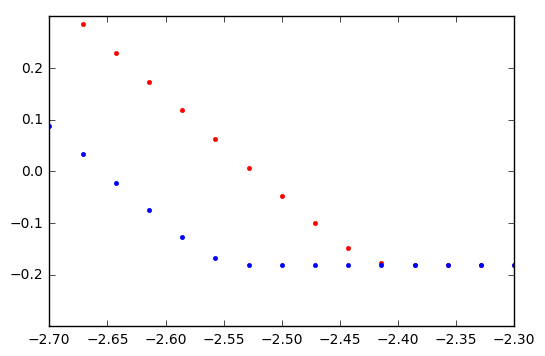

In [17]:
params = copy(ParametersDefault)
params.pz = 0.5
params.EigenvectorsCount = 20 

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.

pyMin = -2.7
pyMax = -2.3
pyCount = 15


params.lBinv2 = 1./20.**2
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbove = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)]


params.lBinv2 = 1./19.5**2
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAboveBvar = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)] 


import matplotlib.pyplot as plt
pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAboveBvar[i][0] for i in range(pyCount)],'b.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()


del params, fsys_1D, pyMin, pyMax, pyCount, evals, evecs, evalsAbove, evalsAboveBvar, pyGrid

## $p^z$ is right at one of the Weyl nodes: nothing special

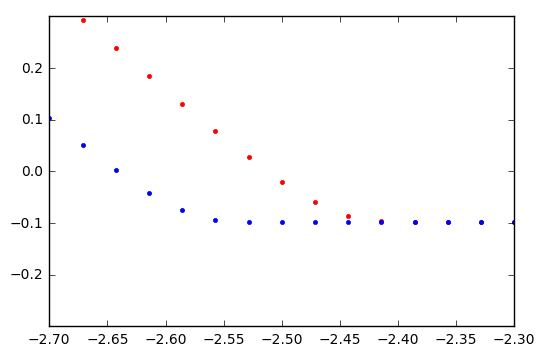

In [18]:
params = copy(ParametersDefault)
params.pz = 0.631
params.EigenvectorsCount = 20

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.

pyMin = -2.7
pyMax = -2.3
pyCount = 15


params.lBinv2 = 1./20.**2
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbove = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)] 


params.lBinv2 = 1./19.5**2
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAboveBvar = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)] 


import matplotlib.pyplot as plt
pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAboveBvar[i][0] for i in range(pyCount)],'b.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()


del params, fsys_1D, pyMin, pyMax, pyCount, evals, evecs, evalsAbove, evalsAboveBvar, pyGrid

## The velocity $\partial \epsilon / \partial p^z$ along the $z$-direction can have different signs

## For $p^z$ around on of the Weyl nodes, the velocity is positive

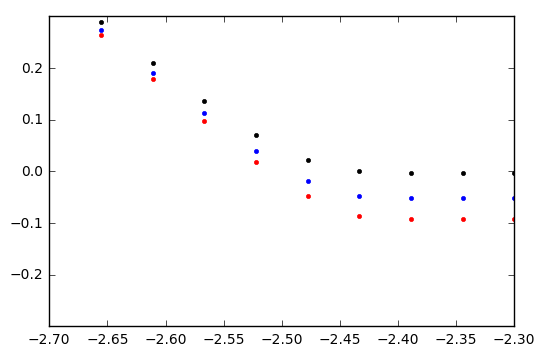

In [19]:
params = copy(ParametersDefault)
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 20 

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.

pyMin = -2.7
pyMax = -2.3
pyCount = 10


params.pz = 0.64
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbove = [[energy for energy in evals[:][i] if \
               energy > LandauEnergyTh(0,params,Deltapz = params.pz - params.pzNode1,NodeNumber=1) - 0.03]\
              for i in range(pyCount)] 


params.pz = 0.7
evalsPzVar, evecsPzVar = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbovePzVar = [[energy for energy in evalsPzVar[:][i] if \
               energy > LandauEnergyTh(0,params,Deltapz = params.pz - params.pzNode1,NodeNumber=1) - 0.03]\
              for i in range(pyCount)] 


params.pz = 0.77
evalsPzVar2, evecsPzVar2 = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbovePzVar2 = [[energy for energy in evalsPzVar2[:][i] if \
               energy > LandauEnergyTh(0,params,Deltapz = params.pz - params.pzNode1,NodeNumber=1) - 0.03]\
              for i in range(pyCount)]



pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAbovePzVar[i][0] for i in range(pyCount)],'b.')
plt.plot(pyGrid, [evalsAbovePzVar2[i][0] for i in range(pyCount)],'k.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()


del params, fsys_1D, pyMin, pyMax, pyCount, evals, evecs, evalsAbove, evalsAbovePzVar, evalsAbovePzVar2, pyGrid

## For $p^z$ around the other node, the velocity is negative

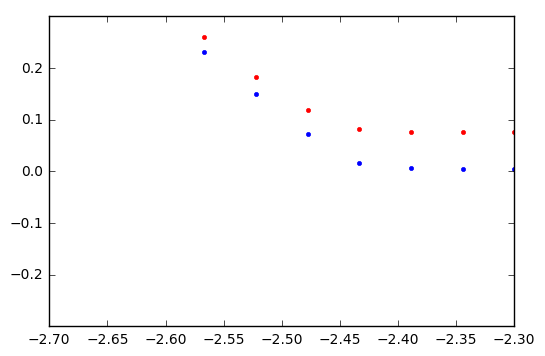

In [20]:
params = copy(ParametersDefault)
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 10 

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.


pyMin = -2.7
pyMax = -2.3
pyCount = 10

params.pz = -0.6
evals, evecs = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbove = [[energy for energy in evals[i] if \
               energy > LandauEnergyTh(0,params,Deltapz = params.pz - params.pzNode2,NodeNumber=2) - 0.02]\
              for i in range(pyCount)] 

params.pz = -0.5
evalsPzVar, evecsPzVar = pSweep_1D( fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
evalsAbovePzVar = [[energy for energy in evalsPzVar[i] if \
               energy > LandauEnergyTh(0,params,Deltapz = params.pz - params.pzNode2,NodeNumber=2) - 0.02]\
              for i in range(pyCount)] 

pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAbovePzVar[i][0] for i in range(pyCount)],'b.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()


del params, fsys_1D, pyMin, pyMax, pyCount, evals, evecs, evalsAbove, evalsAbovePzVar, pyGrid

# Where does the velocity flip happen?

# Different strategy: fix $p^y$ and sweep $p^z$

## $x=-L_x/2$ side of the sample

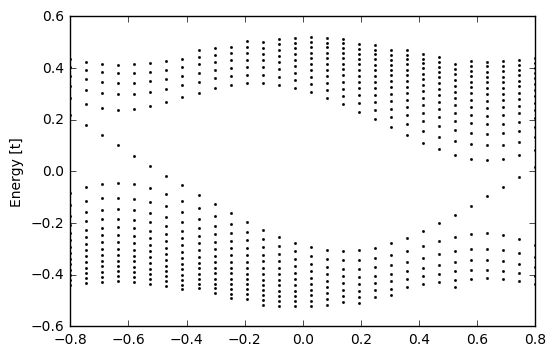

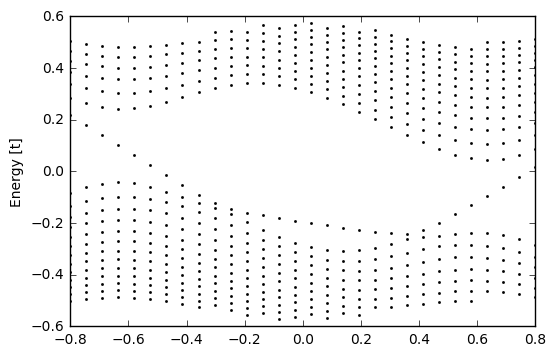

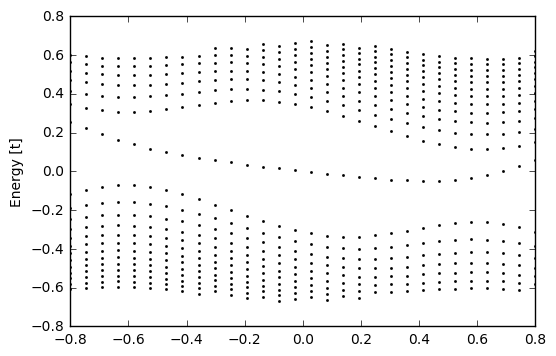

In [27]:
params = copy(ParametersDefault)
params.lBinv2 = 1./20.**2
params.FermiEnergy = 0.
params.EigenvectorsCount = 20

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
params.x_shift= 2000./2.

pzMin = -0.8
pzMax = 0.8
pzCount = 30

params.py = 0.0
evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

params.py = -2.4
evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

params.py = -2.5
evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)


del params, fsys_1D, pzMin, pzMax, pzCount, evals, evecs